# <center> Buying A House </center>
***

## <center> Motivation </center>
If you're anything like me, then I'm sure you're sick of paying rent, wondering why you are paying someone else when this money could go into owning a house. At first, it seems like a no-brainer! Trade your rent in for a mortgage payment and then at least some of your money is being saved. But there are a bunch of things you don't consider when this thought first crosses your mind. Here's to shedding some light on purchasing your first house.

Before anything else, lets jump straight to the fun stuff! Here is a tool I created to help visualize how different aspects of your situation and how possible loans will affect both your current liquidity and your net worth.

In [1]:
# Imports

import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import widgets, Label, Layout
from IPython.display import display, clear_output
from ipywidgets.widgets import IntSlider, FloatSlider, Label, VBox, HBox, Checkbox, Button

# To prevent automatic figure display when execution of the cell ends
% matplotlib inline
%config InlineBackend.close_figures=False

In [2]:
# Creating the Interface Components

# Income Group
income_label = Label(r'$ \underline{ \textbf{Income} } $')

label1 = Label('Income')
label2 = Label('Additional Income')
label3 = Label('Income Tax')
income_label_box = VBox(children=(label1, label2, label3))

income_slider = IntSlider(72500, 0, 150000, 500, layout=Layout(width='auto'))
coc_slider = IntSlider(1100, 0, 3000, 100, layout=Layout(width='auto'))
taxes_slider = IntSlider(20, 0, 30, 1, layout=Layout(width='auto'))
income_slider_box = VBox(children=(income_slider, coc_slider, taxes_slider))

temp = HBox(children=(income_label_box, income_slider_box))
income_group = VBox(children=(income_label, temp))

# Expense Group
expense_label = Label(r'$ \underline{ \textbf{Expenses} } $')

label1 = Label('Rent')
label2 = Label('General')
label3 = Label('Utilities')
expense_label_box = VBox(children=(label1, label2, label3))

rent_slider = IntSlider(14500, 0, 25000, 500, layout=Layout(width='auto'))
general_slider = IntSlider(5000, 0, 15000, 100, layout=Layout(width='auto'))
utilities_slider = IntSlider(1000, 0, 3000, 100, layout=Layout(width='auto'))
expense_slider_box = VBox(children=(rent_slider, general_slider, utilities_slider))

temp = HBox(children=(expense_label_box, expense_slider_box))
expense_group = VBox(children=(expense_label, temp))

# Savings Group
savings_label = Label(r'$ \underline{ \textbf{Savings} } $')

label1 = Label('Cash')
label2 = Label('401K Savings')
label3 = Label('Roth Savings')
savings_label_box = VBox(children=(label1, label2, label3))

cash_slider = IntSlider(38000, 0, 100000, 1000, layout=Layout(width='auto'))
roth_slider = IntSlider(20000, 0, 100000, 1000, layout=Layout(width='auto'))
ira_slider = IntSlider(24000, 0, 100000, 1000, layout=Layout(width='auto'))
savings_slider_box = VBox(children=(cash_slider, ira_slider, roth_slider))

temp = HBox(children=(savings_label_box, savings_slider_box))
savings_group = VBox(children=(savings_label, temp))

# Investment Group
investment_label = Label(r'$ \underline{ \textbf{Investments} } $')

label1 = Label('Investment Rate')
label2 = Label('401K Contributions')
label3 = Label('Roth Contributions')
investment_label_box = VBox(children=(label1, label2, label3))

invest_rate_slider = IntSlider(10, 0, 20, 1, layout=Layout(width='auto'))
ira_contr_slider = IntSlider(18000, 0, 18000, 500, layout=Layout(width='auto'))
roth_contr_slider = IntSlider(5500, 0, 5500, 500, layout=Layout(width='auto'))
investment_slider_box = VBox(children=(invest_rate_slider, ira_contr_slider, roth_contr_slider))

temp = HBox(children=(investment_label_box, investment_slider_box))
investment_group = VBox(children=(investment_label, temp))

# Loan Group
loan_label = Label(r'$ \underline{ \textbf{Loans} } $')

label1 = Label('Loan1 Years')
label2 = Label('Loan1 Interest')
label3 = Label('Loan2 Years')
label4 = Label('Loan2 Interest')
loan_label_box = VBox(children=(label1, label2, label3, label4))

loan1_years_slider = IntSlider(10, 10, 30, 5, layout=Layout(width='auto'))
loan1_interest_slider = FloatSlider(value=3.5, min=2, max=5, step=0.1, layout=Layout(width='auto'))
loan2_years_slider = IntSlider(30, 10, 30, 5, layout=Layout(width='auto'))
loan2_interest_slider = FloatSlider(value=4, min=2, max=5, step=0.1, layout=Layout(width='auto'))
loan_slider_box = VBox(children=(loan1_years_slider, loan1_interest_slider, loan2_years_slider, loan2_interest_slider))

temp = HBox(children=(investment_label_box, investment_slider_box))
loan_group = VBox(children=(investment_label, temp))

# Plot Options Group
dont_buy_cash = Checkbox(description='Don\'t Buy: Cash', value=True, layout=Layout(width='33%', justify_content='center'))
dont_buy_equity = Checkbox(description='Don\'t Buy: Equity', value=True, layout=Layout(width='33%', justify_content='center'))

loan1_cash = Checkbox(description='Loan1: Cash', value=True, layout=Layout(width='33%', justify_content='center'))
loan1_equity = Checkbox(description='Loan1: Equity', value=True, layout=Layout(width='33%', justify_content='center'))

loan2_cash = Checkbox(description='Loan2: Cash', value=True, layout=Layout(width='34%', justify_content='center'))
loan2_equity = Checkbox(description='Loan2: Equity', value=True, layout=Layout(width='34%', justify_content='center'))

hbox1 = HBox(children=(dont_buy_cash, loan1_cash, loan2_cash), layout=Layout(width='100%'))
hbox2 = HBox(children=(dont_buy_equity, loan1_equity, loan2_equity), layout=Layout(width='100%'))

# Creating the Interface
house_slider = IntSlider(250000, 0, 500000, 5000, description="House Cost", layout=Layout(width='100%'))
outlook_slider = IntSlider(30, 2, 50, 1, description="Outlook", layout=Layout(width='100%'))
update_button = Button(description='Update', layout=Layout(width='100%'))

out = widgets.Output()
empty_label = Label()

plot_title_label = Label(r'$ \underline{ \textbf{Comparing Options} } $', layout=Layout(align_items='center'))

vbox1 = VBox(children = (income_label, income_label_box, savings_label, savings_label_box, expense_label, expense_label_box, investment_label, investment_label_box, loan_label, loan_label_box))
vbox2 = VBox(children = (empty_label, income_slider_box, empty_label, savings_slider_box, empty_label, expense_slider_box, empty_label, investment_slider_box, empty_label, loan_slider_box), layout=Layout(flex='1 1 auto', width='auto'))
vbox3 = VBox(children = (plot_title_label, out, outlook_slider, house_slider, update_button, hbox1, hbox2), layout=Layout(align_items='center'))
interface = HBox(children = (vbox1, vbox2, vbox3))

In [3]:
# Class Objects and Methods

class Sliders(object):
    def __init__(self):
        self.update()
        
    def update(self):
        # Income
        self.income = income_slider.value # Income from Work
        self.coc = coc_slider.value # Approximate monthly cash on cash return ($)
        self.taxes = taxes_slider.value # Approximate total income tax (%)
        
        # Expenses
        self.rent = rent_slider.value # Apt Rental
        self.general = general_slider.value # General expenses (food/gas/etc)
        self.utilities = utilities_slider.value   # Phone/Wifi/Electric
        
        # Savings
        self.cash = cash_slider.value # Current Savings (Excluding IRAs)
        self.roth = roth_slider.value # Roth investment per year
        self.ira = ira_slider.value   # 401K investment per year
        
        # Investments
        self.invest_rate = invest_rate_slider.value # Interest on investments (%)
        self.ira_contr = ira_contr_slider.value   # Yearly contribution to 401(K)
        self.roth_contr = roth_contr_slider.value # Yearly contribution to roth ira
        
        # Loans
        self.loan1_years = loan1_years_slider.value
        self.loan1_interest = loan1_interest_slider.value
        self.loan2_years = loan2_years_slider.value
        self.loan2_interest = loan2_interest_slider.value
        
        # House Cost
        self.house = house_slider.value# Cost of house
        self.down = 0.2 * self.house  # Down payment on house (Need to account for additional fees)
        if self.down > self.cash: self.down = self.cash  # Cant put more down then you have
        
        # Plot Options
        self.outlook = outlook_slider.value
        self.plot_dont_buy_cash = dont_buy_cash.value
        self.plot_dont_buy_equity = dont_buy_equity.value
        self.plot_loan1_cash = loan1_cash.value
        self.plot_loan1_equity = loan1_equity.value
        self.plot_loan2_cash = loan2_cash.value
        self.plot_loan2_equity = loan2_equity.value
        
        # Variable adjustments (taxes and things)
        self.taxes = 1 - self.taxes/100.0

        # Remove taxes, ira contributions, and general expenses from income
        self.expenses = self.utilities + self.general  # Don't add rent or mortgage here, they are accounted for later
        self.profit = (self.income - self.ira_contr) * self.taxes - self.roth_contr - self.expenses

        self.coc *= 12 * self.taxes  # Make yearly than remove taxes
        self.taxed_invest_rate = self.invest_rate/100.0 * self.taxes + 1 # Remove taxes from investment earnings
        self.invest_rate =  self.invest_rate/100.0 + 1

sliders = Sliders()

class Loan(object):
    
    def __init__(self, years=30, interest=4, value=(sliders.house-sliders.down)):
        """
        years: Number of years to pay off loan
        interest: Interest Rate on loan
        value: Original loan amount
        """
        
        self.value = sliders.house - sliders.down
        self.interest = interest/1200.0  # Convert interest to decimal, then into per month basis
        self.years = years
        self.months = 12*years
        
        # The monthly mortgage payment for the loan
        temp = (1 + self.interest)**self.months
        mortgage = (self.value * self.interest * temp) / (temp - 1)
        self.mortgage = 12*mortgage
    
    def outlook(self, year):
        """
        year: Outlook across how many years
        loan: Instance of Loan class
        return: cash and equity up to year
        """

        gain = sliders.profit + sliders.coc - self.mortgage 
        cash = [0]  # cash is 0 because spent all extra cash on house
        iras = [sliders.ira + sliders.roth]  # Sum of ira savings (401K and roth)
        equity = [sliders.down + iras[0]]  # equity[0] is the downpayment on the house plus ira savings
        for i in range(1, year + 1):
            if i==self.years+1: gain += self.mortgage  # After loan payed off, more money in pocket
            cash.append(sliders.taxed_invest_rate*cash[i-1] + gain)
            iras.append(sliders.invest_rate * iras[i-1] + sliders.ira_contr + sliders.roth_contr)
            equity.append(cash[i] + iras[i] + self.owned(i) + sliders.down)
        
        return cash, equity
    
    def owned(self, year):
        """
        year: Number of years since start of loan
        return: The amount of $ you own of the loan
        """
        
        month = year * 12  # Convert year to month
        if month > self.months: month = self.months  # Cant own more than the loan value

        temp = (1 + self.interest)**self.months
        bal = ( self.value * (temp - (1 + self.interest)**month) ) / (temp - 1)

        return self.value - bal

def dont_buy(year):
    gain = sliders.profit - sliders.rent

    cash = [sliders.cash]   # Have cash because you didn't buy that house
    iras = [sliders.ira + sliders.roth]  # Sum of ira savings (401K and roth)
    equity = [sliders.cash + iras[0]]  # equity[0] is the downpayment on the house plus ira savings
    for i in range(1, year + 1):
        cash.append(gain + sliders.taxed_invest_rate * cash[i-1])
        iras.append(sliders.invest_rate * iras[i-1] + sliders.ira_contr + sliders.roth_contr)
        equity.append(cash[i] + iras[i])
    return cash, equity

def plot_results(button):
    sliders.update()
    ax.clear()
    ax.yaxis.tick_right()
    
    i = np.arange(sliders.outlook + 1)
    
    if sliders.plot_dont_buy_cash or sliders.plot_dont_buy_equity:
        cash, equity = dont_buy(i[-1])
        if sliders.plot_dont_buy_cash:
            ax.plot(i, cash, label="Dont Buy: Cash")
        if sliders.plot_dont_buy_equity:
            ax.plot(i, equity, label="Dont Buy: Equity")
    
    if sliders.plot_loan1_cash or sliders.plot_loan1_equity:
        loan1 = Loan(sliders.loan1_years, sliders.loan1_interest)
        cash, equity = loan1.outlook(i[-1])
        if sliders.plot_loan1_cash:
            ax.plot(i, cash, label="Loan1: Cash")
        if sliders.plot_loan1_equity:
            ax.plot(i, equity, label="Loan1: Equity")
    
    if sliders.plot_loan2_cash or sliders.plot_loan2_equity:
        loan2 = Loan(sliders.loan2_years, sliders.loan2_interest)
        cash, equity = loan2.outlook(i[-1])
        if sliders.plot_loan2_cash:
            ax.plot(i, cash, label="Loan2: Cash")
        if sliders.plot_loan2_equity:
            ax.plot(i, equity, label="Loan2: Equity")
    
    ax.grid(which='both')
    ax.set_xlabel("Number of Years")
    ax.set_ylabel("Money $$$")
    ax.legend()

    with out:
        clear_output(wait=True)
        display(ax.figure)

In [4]:
# Display the Interface

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.ioff()
ax=plt.gca()

update_button.on_click(plot_results)

display(interface)
plot_results(None)

HBox(children=(VBox(children=(Label(value=u'$ \\underline{ \\textbf{Income} } $'), VBox(children=(Label(value=u'Income'), Label(value=u'Additional Income'), Label(value=u'Income Tax'))), Label(value=u'$ \\underline{ \\textbf{Savings} } $'), VBox(children=(Label(value=u'Cash'), Label(value=u'401K Savings'), Label(value=u'Roth Savings'))), Label(value=u'$ \\underline{ \\textbf{Expenses} } $'), VBox(children=(Label(value=u'Rent'), Label(value=u'General'), Label(value=u'Utilities'))), Label(value=u'$ \\underline{ \\textbf{Investments} } $'), VBox(children=(Label(value=u'Investment Rate'), Label(value=u'401K Contributions'), Label(value=u'Roth Contributions'))), Label(value=u'$ \\underline{ \\textbf{Loans} } $'), VBox(children=(Label(value=u'Loan1 Years'), Label(value=u'Loan1 Interest'), Label(value=u'Loan2 Years'), Label(value=u'Loan2 Interest'))))), VBox(children=(Label(value=u''), VBox(children=(IntSlider(value=72500, layout=Layout(width=u'auto'), max=150000, step=500), IntSlider(value=1100, layout=Layout(width=u'auto'), max=3000, step=100), IntSlider(value=20, layout=Layout(width=u'auto'), max=30))), Label(value=u''), VBox(children=(IntSlider(value=38000, layout=Layout(width=u'auto'), max=100000, step=1000), IntSlider(value=24000, layout=Layout(width=u'auto'), max=100000, step=1000), IntSlider(value=20000, layout=Layout(width=u'auto'), max=100000, step=1000))), Label(value=u''), VBox(children=(IntSlider(value=14500, layout=Layout(width=u'auto'), max=25000, step=500), IntSlider(value=5000, layout=Layout(width=u'auto'), max=15000, step=100), IntSlider(value=1000, layout=Layout(width=u'auto'), max=3000, step=100))), Label(value=u''), VBox(children=(IntSlider(value=10, layout=Layout(width=u'auto'), max=20), IntSlider(value=18000, layout=Layout(width=u'auto'), max=18000, step=500), IntSlider(value=5500, layout=Layout(width=u'auto'), max=5500, step=500))), Label(value=u''), VBox(children=(IntSlider(value=10, layout=Layout(width=u'auto'), max=30, min=10, step=5), FloatSlider(value=3.5, layout=Layout(width=u'auto'), max=5.0, min=2.0), IntSlider(value=30, layout=Layout(width=u'auto'), max=30, min=10, step=5), FloatSlider(value=4.0, layout=Layout(width=u'auto'), max=5.0, min=2.0)))), layout=Layout(flex=u'1 1 auto', width=u'auto')), VBox(children=(Label(value=u'$ \\underline{ \\textbf{Comparing Options} } $', layout=Layout(align_items=u'center')), Output(), IntSlider(value=30, description=u'Outlook', layout=Layout(width=u'100%'), max=50, min=2), IntSlider(value=250000, description=u'House Cost', layout=Layout(width=u'100%'), max=500000, step=5000), Button(description=u'Update', layout=Layout(width=u'100%'), style=ButtonStyle()), HBox(children=(Checkbox(value=True, description=u"Don't Buy: Cash", layout=Layout(justify_content=u'center', width=u'33%')), Checkbox(value=True, description=u'Loan1: Cash', layout=Layout(justify_content=u'center', width=u'33%')), Checkbox(value=True, description=u'Loan2: Cash', layout=Layout(justify_content=u'center', width=u'34%'))), layout=Layout(width=u'100%')), HBox(children=(Checkbox(value=True, description=u"Don't Buy: Equity", layout=Layout(justify_content=u'center', width=u'33%')), Checkbox(value=True, description=u'Loan1: Equity', layout=Layout(justify_content=u'center', width=u'33%')), Checkbox(value=True, description=u'Loan2: Equity', layout=Layout(justify_content=u'center', width=u'34%'))), layout=Layout(width=u'100%'))), layout=Layout(align_items=u'center'))))

## <center> Slider Descriptions </center><br>
<center> Whoa! Too many options you say? Here is a quick breakdown of what each component does </center>

### Income
- **Income**: Gross yearly income amount (From your part/full time job before taxes)
- **Income Tax**: Total approximate income tax (%) including state and federal
- **CoC Return**: Not quite the Cash on Cash Return, but the approximate monthly rental income minus property taxes, maintenance, and other fees

### Savings
- **Cash**: Total cash on hand for a down payment on a loan
- **401K Savings**: Total savings in your 401(K)
- **Roth Savings**: Total savings in your roth ira

### Expenses
- **Rent**: Yearly amount you pay on rent (Doesn't affect loan calculations)
- **General**: Yearly amount you pay on general expenses including gas, food, travel, etc.
- **Utilities**: Yearly amount you pay on utilities including electric, internet, phone, etc.


### Investments
- **Investment Rate**: Approximated yearly yield (%) on investments (stocks, bonds, etc.)
- **401K Contributions**: Yearly contribution to 401(K)
- **Roth Contributions**: Yearly contribution to roth ira

### Loans
- **LoanX Years**: Number of years to pay back loan
- **LoanX Interest**: Interest on the loan (%)

### Plot

- **Plot Area**: An illustration of liquidity vs equity over a span of time

- **Outlook**: Number of years to forecast
- **House Cost**: Cost of house that you might buy - directly affects loan amount
- **Update**: Button to update results with latest settings
- **CheckBoxes**: Display options; Cash represents liquidity, equity represents net worth.

## <center> Analysis </center>
<center> So what does this all mean? How do you get to the bottom of the real question; Should you buy a house?</center><br>
Well to answer this question, it is helpful to ask yourself the following

- What is the best loan option? Do I want a short term loan and pay it off quickly, or am I better of with a long term loan?
- How advantageous is it if I rent out the spare room or get a duplex?
- Am I better off skipping my IRA investments to help pay off the loan?

### Loan Options
Since this is your first house, I'm going to assume you can't afford to pay all cash. So the obvious question is which type of loan is the best option? My first reaction was the assumption a short term loan would be way better. With a long term loan you are paying a crap ton more in interest (See "Banks Making Money").

But a quick look at the results and probably everyone would agree with me in that a long term loan appears to be better. Both your equity and liquidity remain higher for practically the entirety of the results. For the sake of this discussion, I assumed the difference between a 10 year loan and a 30 year loan was about 1% interest, but its not until about ~3% difference do these two even out.

**Takeaway: A long term loan results in much higher liquidity across the entirety of the loan**

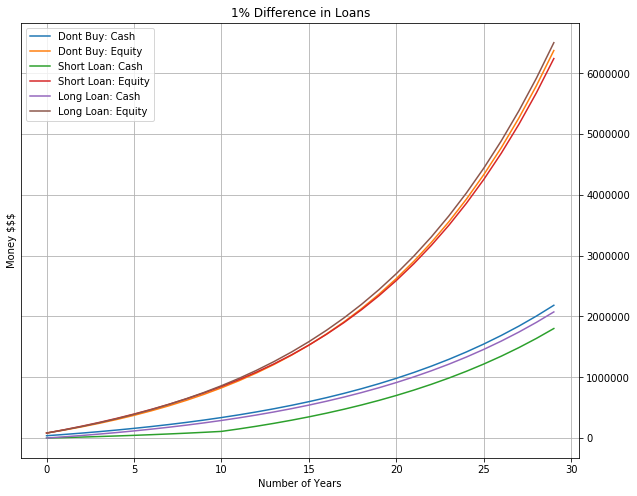

### Renting
The next thought that crossed my mind was the possibility of renting out the spare room in a two bedroom house or getting a duplex and living for 'free' in one of the units. As you can see, this would greatly increase your liquidity and equity:

**Takeaway: Rent out part of your new home if you can!**

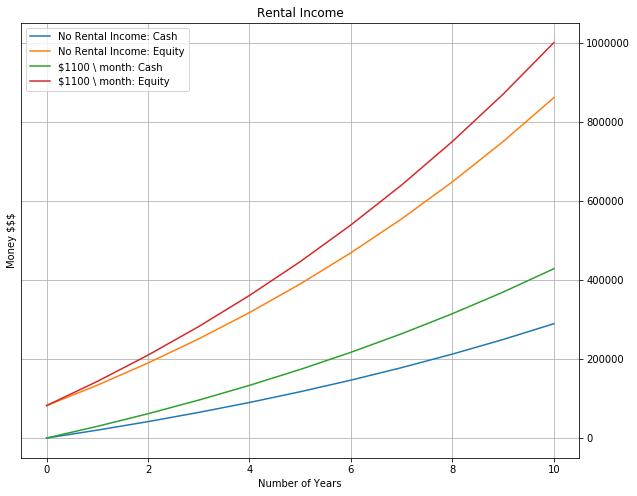

### IRA Contributions
This has less to do with buying a house than it does with general advice on IRA contributions.<br>
Sorry this plot is a little misconceiving; taxes have not been taken out of equity because it represents the money as if it were still in the 401K.<br>
The hope is that you'll be in a lower income tax bracket when you retire so that in the end you will end up with more money.<br>
ie) If your tax bracket remained the same, the two equity plots (orange and red lines) would be the same.

**Takeaway: Contribute as much as you can to those IRAs**

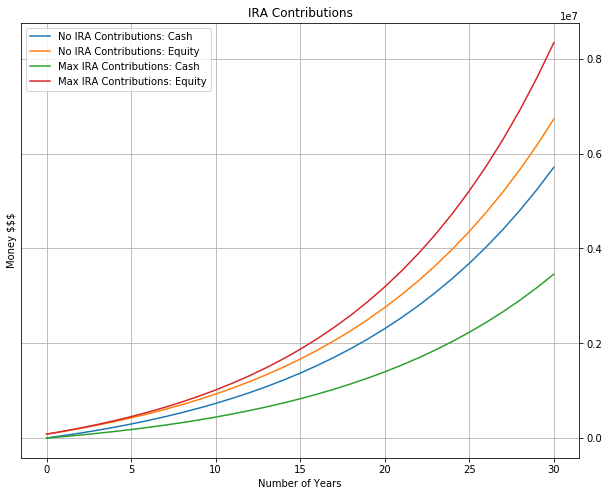

## <center> Conclusion: Buy That House! </center><br>
<center>Here is what a typical scenario would look like (actually the scenario I am in right now):</center>

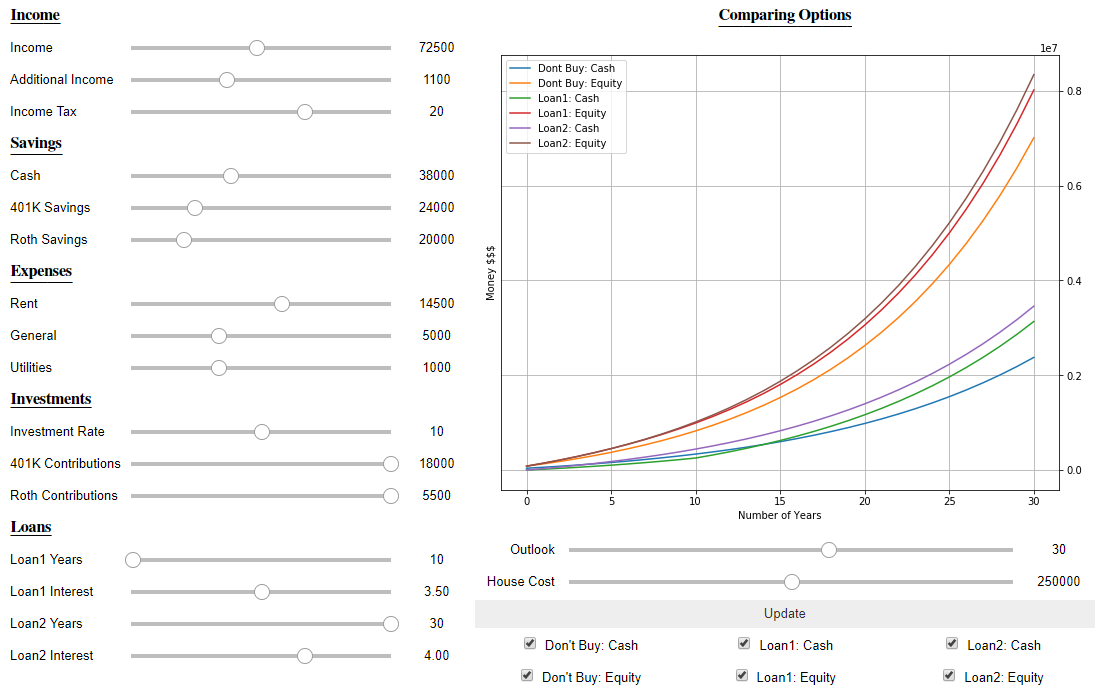

You can see that, after about 4 years, your liquidity is back to about where it would have been had you not bought a house. And now that you did, you own part of that house and soon everything accelerates way beyond what you would've have made if you had not bought that house.

Once you wrap your head around all of this, you might begin to wonder if you could take out multiple long term loans and compound additional rental income! Now just hand off all that extra maintenance and work to some manager and you've made a completely self-sustaining and passive income! Is financial freedom in reach? Now you truly are a genius :)

## <center> Plot Derivations </center><br>

<center> In case you are interested in the [math](https://www.mtgprofessor.com/formulas.htm) behind the scenes</center>

### Initial Slider Value Adjustments

$taxes = 1 - \frac{taxes}{100}$<br>
$expenses = utilities + general$<br>
$profit = (income - ira\_contributions) * taxes - roth\_contributions - expenses$<br>
$apartment\_income = apartment\_income * 12 * taxes$<br>
$taxed\_invest\_rate = \frac{invest\_rate}{100} * taxes + 1$<br>
$invest\_rate = \frac{invest\_rate}{100} + 1$

### Loan Calculations
$loan\_value = house\_cost - down\_payment$<br>
$months = 12*years$

Make interest monthly:<br>
$interest = \frac{interest}{1200}$<br>

Yearly mortgage payments:<br>
$mortgage = 12 * \frac{loan\_value * interest * (1 + interest)^{months}}{(1 + interest)^{months} - 1}$

Owned amount of loan:<br>
$owned[i] = loan\_value - \frac{ loan\_value * ((1 + interest)^{months} - (1 + interest)^{12 * i})}{(1 + interest)^{months} - 1}$

### Not Buying a House

$gain = profit - rent$<br>
$iras[0] = ira + roth$<br>
$equity[0] = cash + iras[0]$<br>

cash[i] = gain + taxed_invest_rate * cash[i-1]<br>
iras[i] = invest_rate * iras[i-1] + ira_contr + roth_contr<br>
equity[i] = cash[i] + iras[i]

### Buying a House

$down\_payment = cash$<br>
$gain = profit + rental\_income - mortgage$<br>

Once the the loan is payed off:<br>
$gain = profit + rental\_income$

$cash[0] = 0$<br>
$iras[0] = ira + roth$<br>
$equity[0] = down\_payment + iras[0]$

$cash[i] = taxed\_invest\_rate * cash[i-1] + gain$<br>
$iras[i] = invest\_rate * iras[i-1] + ira\_contr + roth\_contr$

equity[i] = cash[i] + iras[i] + owned[i] + down\_payment

## <center> Banks Making Money </center>

So how much more are you actually paying the bank in interest if you get a long term loan over a short term loan?

In [8]:
# Amount of interest payed on a $200,00 loan

loan_value = 2e5  # 200,000
short_loan = Loan(10, 3.5, loan_value)
long_loan = Loan(30, 4, loan_value)

short_interest = (short_loan.mortgage * short_loan.years) - short_loan.value
long_interest = (long_loan.mortgage * long_loan.years) - long_loan.value

print "On a $200,000 loan"
print "Interest payed over 10 years, 3.5%% interest: %.2f" % short_interest
print "Interest payed over 30 years, 4.0%% interest: %.2f" % long_interest

On a $200,000 loan
Interest payed over 10 years, 3.5% interest: 39565.65
Interest payed over 30 years, 4.0% interest: 152363.35
